# Importing Necessary Libraries

In [1]:
# For analysis and numerical functions
import numpy as np
import pandas as pd
# For visualisation and analysis
import matplotlib.pyplot as plt
import seaborn as sns
# Warnings
import warnings
warnings.filterwarnings(action='ignore')

# later we will import some more machine learning libraries as per need

# Dataset Loading

In [2]:
#using pandas library and 'read_csv' function to read csv file 
df=pd.read_csv("day.csv")
#examine head 
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Data Sanity Checks

In [3]:
#checking the number of rows and the number of columns, respectively.
df.shape

(730, 16)

In [4]:
df.info

<bound method DataFrame.info of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspee

# Missing Value Check

In [5]:
df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [6]:
# In this dataset there is no missing values

In [7]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

# Dropping unnecessary columns

In [8]:
df1=df.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [9]:
df1.shape 

(730, 11)

# Mapping necessary columns

In [10]:
#To analyze categorical variables with non-binary values, mapping them to a numerical is required.

In [11]:
# Mapping season column
df1['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)

In [12]:
# Mapping mnth column
df1['mnth'].replace({1:"January",2:"Feburary",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",
                    9:"September",10:"October",11:"November",12:"December"},inplace=True)

In [13]:
# Mapping weekday column
df1['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)

In [14]:
df1['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",
                          4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)

In [15]:
# check the head of the dataset after mapping the non-binary categorical columns
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist_cloudy,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist_cloudy,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear_Few Clouds,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear_Few Clouds,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear_Few Clouds,9.305237,43.6957,12.522300,1600


# Segmentation of columns

In [16]:
#Separating a variable into categorical and continuous columns.
cat_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
cont_cols = ['temp','hum','windspeed']
target_cols=['cnt']
len(cat_cols)+len(cont_cols)+len(target_cols)

11

# Exploratory data analysis (EDA)

In [17]:
df1.nunique

<bound method DataFrame.nunique of      season  yr      mnth  holiday    weekday  workingday        weathersit  \
0    spring   0   January        0   Saturday           0       Mist_cloudy   
1    spring   0   January        0     Sunday           0       Mist_cloudy   
2    spring   0   January        0     Monday           1  Clear_Few Clouds   
3    spring   0   January        0    Tuesday           1  Clear_Few Clouds   
4    spring   0   January        0  Wednesday           1  Clear_Few Clouds   
..      ...  ..       ...      ...        ...         ...               ...   
725  spring   1  December        0   Thursday           1       Mist_cloudy   
726  spring   1  December        0     Friday           1       Mist_cloudy   
727  spring   1  December        0   Saturday           0       Mist_cloudy   
728  spring   1  December        0     Sunday           0  Clear_Few Clouds   
729  spring   1  December        0     Monday           1       Mist_cloudy   

          temp  

# Univariate Analysis

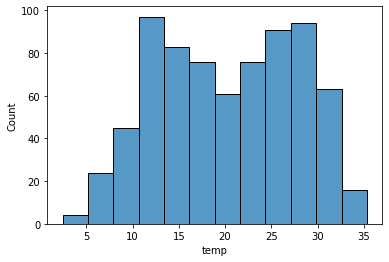

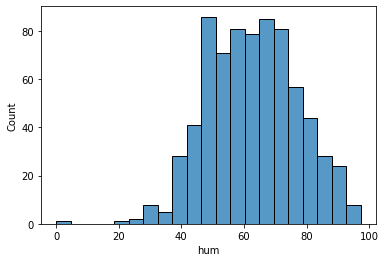

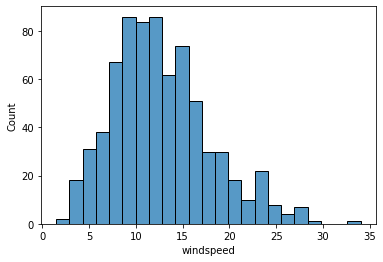

In [18]:
# using the Seaborn library to display univariate histogram plots for continuous columns
for i in cont_cols:
    sns.histplot(df1[i])
    plt.show()

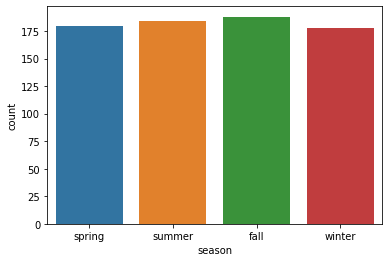

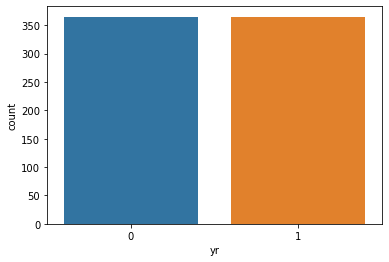

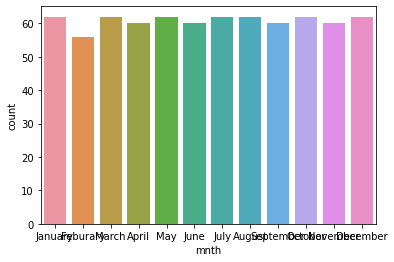

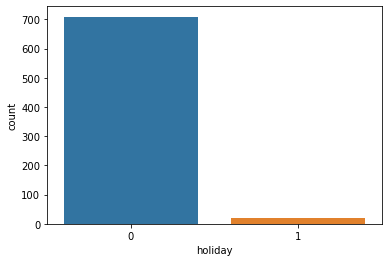

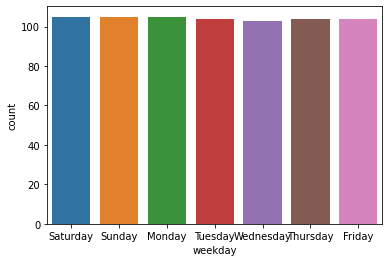

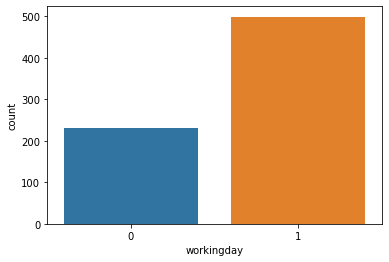

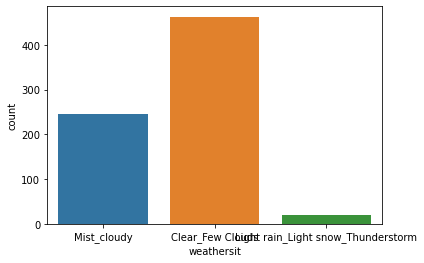

In [19]:
#Using a loop to display count plots for univariate categorical columns.
for i in cat_cols:
    sns.countplot(x=df1[i])
    plt.show()

# Bivariate Analysis

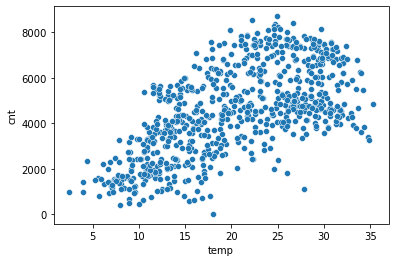

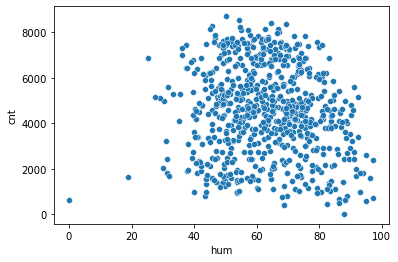

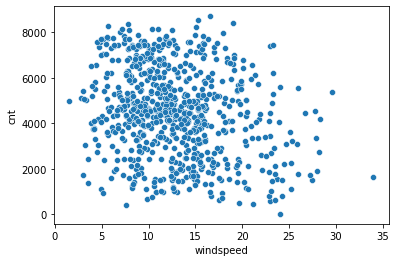

In [20]:
# Analyzing the relationship between continuous columns and the target variable.
for i in cont_cols:
    sns.scatterplot(x=df1[i],y=df1["cnt"])
    plt.show()

# Multivariate Analysis

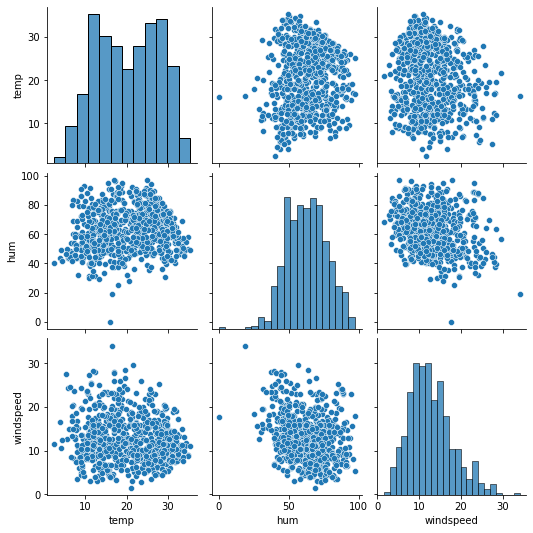

In [21]:
# Using the Seaborn library for multivariate analysis by creating pairplot between all the continuous columns
sns.pairplot(df1[cont_cols])
plt.show()

# Checking correlation coefficient

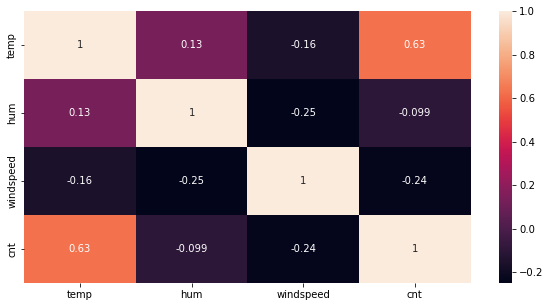

In [22]:
#Visualizing the relationship between variables and the target column using a heatmap.
plt.figure(figsize=(10,5))
sns.heatmap(df1[cont_cols+['cnt']].corr(),annot=True)
plt.show()

# Pre-processing step

# Creation of dummy variable 

In [23]:
# Only for non binary categorical columns
df1[cat_cols].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [24]:
#Dummy variables for season, mnth, weekday, weathersit
dum1=pd.get_dummies(df1.season,drop_first=True)
dum2=pd.get_dummies(df1.mnth,drop_first=True)
dum3=pd.get_dummies(df1.weekday,drop_first=True)
dum4=pd.get_dummies(df1.weathersit,drop_first=True)

In [25]:
# Combining the results into a dataframe.
data_df=pd.concat([dum1,dum2,dum3,dum4,df1],axis=1)
data_df.head()

,spring,summer,winter,August,December,Feburary,January,July,June,March,...,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,January,0,Saturday,0,Mist_cloudy,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,January,0,Sunday,0,Mist_cloudy,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,January,0,Monday,1,Clear_Few Clouds,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,January,0,Tuesday,1,Clear_Few Clouds,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,January,0,Wednesday,1,Clear_Few Clouds,9.305237,43.6957,12.522300,1600


In [26]:
# Drop 'season','mnth','weekday','weathersit' 
data_df.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)
data_df.head()

,spring,summer,winter,August,December,Feburary,January,July,June,March,...,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


# Train-Test Split

In [27]:
#Separating the independent and dependent variables.
x=data_df.drop(["cnt"],axis=1)
y=data_df["cnt"]

In [28]:
#Importing the library for splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split

#Splitting data into training and testing sets to develop and evaluate machine learning models
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)


In [29]:
x_train.shape

(511, 28)

In [30]:
x_test.shape

(219, 28)

In [31]:
y_train.shape

(511,)

In [32]:
y_test.shape

(219,)

# Scaling

In [33]:
#Importing the MinMaxScaler library from scaling
from sklearn.preprocessing import MinMaxScaler 

In [34]:
#Instantiating an object
scaler = MinMaxScaler()

In [35]:
#Scaling the continuous variables in x_train using MinMaxScaler and displaying the first few rows of the resulting dataframe
x_train[cont_cols] = scaler.fit_transform(x_train[cont_cols])
x_train.head()

,spring,summer,winter,August,December,Feburary,January,July,June,March,...,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy,yr,holiday,workingday,temp,hum,windspeed
653,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0.509887,0.575354,0.300794
576,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0.442393,0.640189,0.255342
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0.395666,0.504508,0.188475


In [36]:
#Scaling the continuous variables in x_test using MinMaxScaler and displaying the first few rows of the resulting dataframe
x_test[cont_cols] = scaler.fit_transform(x_test[cont_cols]) 
x_test.head()

,spring,summer,winter,August,December,Feburary,January,July,June,March,...,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy,yr,holiday,workingday,temp,hum,windspeed
184,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0.837241,0.534223,0.149393
535,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0.911423,0.470417,0.231142
299,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0.496221,0.777843,0.443398
221,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0.890387,0.236659,0.449707
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0.821739,0.070765,0.682387


# Feature Selection and Modelling

# Recursive Feature Elimination (RFE)

In [37]:
#Importing the RFE and Linear Regression libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#Using Linear Regression as the estimator and RFE to select a certain number of features by eliminating the rest
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=15)

#Selecting the desired features from the training data using the "selector"
selector=selector.fit(x_train,y_train)
selector.support_

array([ True,  True,  True, False, False, False,  True,  True, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True])

In [38]:
selected_features=list(x_train.columns[selector.support_])
selected_features

['spring',
 'summer',
 'winter',
 'January',
 'July',
 'September',
 'Saturday',
 'Light rain_Light snow_Thunderstorm',
 'Mist_cloudy',
 'yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed']

In [39]:
#Selecting the chosen features in both the training and testing data using RFE.
x_train=x_train[selected_features]
x_test=x_test[selected_features]

In [40]:
x_train.shape,x_test.shape

((511, 15), (219, 15))

In [41]:
#Adding a constant feature to the training and testing data 
import statsmodels.api as sm
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

In [42]:
#Creating model to make predictions

model1=sm.OLS(y_train,x_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.5
Date:                Thu, 04 May 2023   Prob (F-statistic):          1.50e-191
Time:                        17:18:22   Log-Likelihood:                -4114.8
No. Observations:                 511   AIC:                             8262.
Df Residuals:                     495   BIC:                             8329.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               2206.7691    314.541      7.016      0.000    1588.770    2824.769
spring                              -439.3779    179.750     -2.444      0.015    -792.545     -86.211
summer                               442.3136    129.046      3.428      0.001     188.768     695.859
winter                               823.3397    150.044      5.487      0.000     528.538    1118.142
January                             -298.4753    150.964     -1.977      0.049    -595.085      -1.865
July                                -461.8136    157.127     -2.939      0.003    -770.531    -153.096
September                            705.8967    143.243      4.928      0.000     424.457     987.336
Saturday                             466.0363    126.162      3.694      0.000     218.158     713.914
Light rain_Light snow_Thunderstorm -2154.6073    226.496     -9.513      0.000   -2599.620   -1709.594
Mist_cloudy                         -492.1456     90.091     -5.463      0.000    -669.154    -315.137
yr                                  2007.6643     69.617     28.839      0.000    1870.884    2144.445
holiday                             -506.7813    233.946     -2.166      0.031    -966.431     -47.132
workingday                           380.7061    100.209      3.799      0.000     183.819     577.594
temp                                4437.9745    298.850     14.850      0.000    3850.804    5025.145
hum                                -1366.6057    324.706     -4.209      0.000   -2004.578    -728.633
windspeed                          -1619.1366    221.733     -7.302      0.000   -2054.791   -1183.482
==============================================================================
Omnibus:                       66.238   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.707
Skew:                          -0.677   Prob(JB):                     2.09e-35
Kurtosis:                       5.381   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Variance Inflation Factor (VIF)

In [43]:
#Importing the VIF function from the statsmodels library for checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [44]:
get_VIF(x_train)

,Features,VIF
13,hum,29.39
12,temp,17.80
11,workingday,5.32
14,windspeed,4.73
0,spring,4.53
2,winter,3.48
1,summer,2.85
8,Mist_cloudy,2.29
9,yr,2.09
6,Saturday,1.98


In [45]:
#Dropping the "hum" feature from the dataframe due to its high VIF value
x_train=x_train.drop(["hum"],axis=1)
x_test=x_test.drop(["hum"],axis=1)

In [46]:
#Updating data after dropping the "hum" feature
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

In [47]:
#Creating a model2 after dropping the "hum" feature
model2=sm.OLS(y_train,x_train_sm)
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     190.0
Date:                Thu, 04 May 2023   Prob (F-statistic):          6.18e-189
Time:                        17:18:23   Log-Likelihood:                -4123.8
No. Observations:                 511   AIC:                             8278.
Df Residuals:                     496   BIC:                             8341.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               1522.3973    273.747      5.561      0.000     984.550    2060.244
spring                              -517.8708    181.767     -2.849      0.005    -874.999    -160.743
summer                               387.6602    130.536      2.970      0.003     131.188     644.133
winter                               693.3129    149.282      4.644      0.000     400.009     986.617
January                             -339.3758    153.168     -2.216      0.027    -640.315     -38.437
July                                -417.7679    159.397     -2.621      0.009    -730.945    -104.591
September                            654.0040    145.096      4.507      0.000     368.926     939.082
Saturday                             507.6340    127.875      3.970      0.000     256.390     758.878
Light rain_Light snow_Thunderstorm -2533.7977    211.278    -11.993      0.000   -2948.909   -2118.687
Mist_cloudy                         -710.4234     74.897     -9.485      0.000    -857.578    -563.269
yr                                  2042.2594     70.285     29.057      0.000    1904.167    2180.352
holiday                             -485.9446    237.801     -2.043      0.042    -953.167     -18.722
workingday                           407.3465    101.680      4.006      0.000     207.570     607.123
temp                                4111.1718    293.408     14.012      0.000    3534.696    4687.647
windspeed                          -1356.7226    216.342     -6.271      0.000   -1781.782    -931.663
==============================================================================
Omnibus:                       67.777   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.366
Skew:                          -0.690   Prob(JB):                     2.03e-36
Kurtosis:                       5.411   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
get_VIF(x_train)

,Features,VIF
12,temp,7.08
11,workingday,5.26
13,windspeed,4.68
0,spring,3.07
1,summer,2.34
9,yr,2.08
2,winter,1.99
6,Saturday,1.97
3,January,1.62
4,July,1.59


In [49]:
#Keeping the "temp" feature in the dataframe even though it has a high VIF value,for better prediction

In [50]:
#Dropping the "workingday" feature from the dataframe due to its high VIF value
x_train=x_train.drop(["workingday"],axis=1)
x_test=x_test.drop(["workingday"],axis=1)

In [51]:
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

In [52]:
#Creating a model3 after dropping the "workingday" feature
model3=sm.OLS(y_train,x_train_sm)
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.4
Date:                Thu, 04 May 2023   Prob (F-statistic):          1.12e-186
Time:                        17:18:24   Log-Likelihood:                -4131.9
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     497   BIC:                             8351.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               1858.8114    264.465      7.029      0.000    1339.205    2378.418
spring                              -531.8072    184.465     -2.883      0.004    -894.234    -169.381
summer                               380.4966    132.486      2.872      0.004     120.196     640.797
winter                               668.8065    151.399      4.418      0.000     371.347     966.267
January                             -333.6454    155.463     -2.146      0.032    -639.092     -28.199
July                                -443.5813    161.660     -2.744      0.006    -761.203    -125.959
September                            660.2348    147.268      4.483      0.000     370.891     949.579
Saturday                             172.0326     98.067      1.754      0.080     -20.644     364.710
Light rain_Light snow_Thunderstorm -2491.0681    214.180    -11.631      0.000   -2911.878   -2070.259
Mist_cloudy                         -694.0854     75.910     -9.144      0.000    -843.229    -544.942
yr                                  2044.8505     71.338     28.664      0.000    1904.690    2185.011
holiday                             -816.3866    226.390     -3.606      0.000   -1261.186    -371.587
temp                                4122.1149    297.804     13.842      0.000    3537.005    4707.225
windspeed                          -1363.5304    219.586     -6.210      0.000   -1794.962    -932.098
==============================================================================
Omnibus:                       66.075   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.268
Skew:                          -0.713   Prob(JB):                     1.28e-31
Kurtosis:                       5.155   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#Dropping the "Saturday" feature as it has a p-value greater than the significance level
x_train=x_train.drop(["Saturday"],axis=1)
x_test=x_test.drop(["Saturday"],axis=1)

In [54]:
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

In [55]:
#Creating a model4 after dropping the "Saturday" feature
model4=sm.OLS(y_train,x_train_sm)
res4=model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.7
Date:                Thu, 04 May 2023   Prob (F-statistic):          3.46e-187
Time:                        17:18:24   Log-Likelihood:                -4133.5
No. Observations:                 511   AIC:                             8293.
Df Residuals:                     498   BIC:                             8348.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               1887.8974    264.494      7.138      0.000    1368.235    2407.560
spring                              -533.5723    184.846     -2.887      0.004    -896.747    -170.398
summer                               377.9180    132.753      2.847      0.005     117.092     638.744
winter                               670.0846    151.712      4.417      0.000     372.010     968.159
January                             -331.1287    155.781     -2.126      0.034    -637.197     -25.060
July                                -439.7359    161.982     -2.715      0.007    -757.989    -121.483
September                            662.0149    147.571      4.486      0.000     372.076     951.954
Light rain_Light snow_Thunderstorm -2486.9861    214.613    -11.588      0.000   -2908.645   -2065.327
Mist_cloudy                         -693.2208     76.066     -9.113      0.000    -842.671    -543.770
yr                                  2041.0316     71.453     28.565      0.000    1900.645    2181.418
holiday                             -845.4055    226.255     -3.737      0.000   -1289.938    -400.873
temp                                4111.0375    298.358     13.779      0.000    3524.843    4697.232
windspeed                          -1345.4059    219.800     -6.121      0.000   -1777.256    -913.556
==============================================================================
Omnibus:                       59.917   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.728
Skew:                          -0.638   Prob(JB):                     5.55e-30
Kurtosis:                       5.168   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
#Dropping the "summer" feature as it is not important for our prediction
x_train=x_train.drop(["summer"],axis=1)
x_test=x_test.drop(["summer"],axis=1)

In [57]:
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

In [58]:
#Creating a model5 after dropping the "summer" feature
model5=sm.OLS(y_train,x_train_sm)
res5=model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     228.1
Date:                Thu, 04 May 2023   Prob (F-statistic):          1.22e-186
Time:                        17:18:25   Log-Likelihood:                -4137.6
No. Observations:                 511   AIC:                             8299.
Df Residuals:                     499   BIC:                             8350.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               2338.0560    213.523     10.950      0.000    1918.541    2757.571
spring                              -890.9793    136.630     -6.521      0.000   -1159.420    -622.538
winter                               366.6113    108.712      3.372      0.001     153.021     580.201
January                             -373.3132    156.174     -2.390      0.017    -680.153     -66.473
July                                -606.0546    152.151     -3.983      0.000    -904.990    -307.119
September                            504.1307    137.723      3.660      0.000     233.543     774.719
Light rain_Light snow_Thunderstorm -2498.5596    216.097    -11.562      0.000   -2923.132   -2073.988
Mist_cloudy                         -688.1071     76.585     -8.985      0.000    -838.575    -537.639
yr                                  2047.2816     71.926     28.464      0.000    1905.967    2188.597
holiday                             -849.0948    227.856     -3.726      0.000   -1296.771    -401.419
temp                                3758.3798    273.349     13.749      0.000    3221.323    4295.437
windspeed                          -1285.3762    220.338     -5.834      0.000   -1718.281    -852.471
==============================================================================
Omnibus:                       58.759   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.562
Skew:                          -0.613   Prob(JB):                     1.35e-30
Kurtosis:                       5.226   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
##Dropping the "holiday" feature as it is not important for our prediction
x_train=x_train.drop(["holiday"],axis=1)
x_test=x_test.drop(["holiday"],axis=1)

In [60]:
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

In [61]:
#Creating a model6 after dropping the "holiday" feature
model6=sm.OLS(y_train,x_train_sm)
res6=model6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     243.2
Date:                Thu, 04 May 2023   Prob (F-statistic):          7.03e-185
Time:                        17:18:25   Log-Likelihood:                -4144.6
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     500   BIC:                             8358.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               2326.6365    216.235     10.760      0.000    1901.795    2751.478
spring                              -913.3109    138.246     -6.606      0.000   -1184.926    -641.696
winter                               341.0997    109.886      3.104      0.002     125.205     556.994
January                             -381.0105    158.160     -2.409      0.016    -691.751     -70.270
July                                -597.4692    154.081     -3.878      0.000    -900.196    -294.743
September                            472.3673    139.219      3.393      0.001     198.841     745.893
Light rain_Light snow_Thunderstorm -2462.8150    218.648    -11.264      0.000   -2892.397   -2033.233
Mist_cloudy                         -673.2605     77.460     -8.692      0.000    -825.448    -521.073
yr                                  2050.8328     72.841     28.155      0.000    1907.721    2193.944
temp                                3760.6809    276.849     13.584      0.000    3216.751    4304.611
windspeed                          -1301.1387    223.118     -5.832      0.000   -1739.504    -862.774
==============================================================================
Omnibus:                       70.354   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.010
Skew:                          -0.701   Prob(JB):                     2.22e-39
Kurtosis:                       5.529   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
get_VIF(x_train)

,Features,VIF
8,temp,4.64
9,windspeed,4.01
0,spring,2.23
7,yr,2.07
2,January,1.60
6,Mist_cloudy,1.53
1,winter,1.38
3,July,1.36
4,September,1.20
5,Light rain_Light snow_Thunderstorm,1.08


In [63]:
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

In [64]:
#Creating final model7
model7=sm.OLS(y_train,x_train_sm)
res7=model7.fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     243.2
Date:                Thu, 04 May 2023   Prob (F-statistic):          7.03e-185
Time:                        17:18:26   Log-Likelihood:                -4144.6
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     500   BIC:                             8358.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               2326.6365    216.235     10.760      0.000    1901.795    2751.478
spring                              -913.3109    138.246     -6.606      0.000   -1184.926    -641.696
winter                               341.0997    109.886      3.104      0.002     125.205     556.994
January                             -381.0105    158.160     -2.409      0.016    -691.751     -70.270
July                                -597.4692    154.081     -3.878      0.000    -900.196    -294.743
September                            472.3673    139.219      3.393      0.001     198.841     745.893
Light rain_Light snow_Thunderstorm -2462.8150    218.648    -11.264      0.000   -2892.397   -2033.233
Mist_cloudy                         -673.2605     77.460     -8.692      0.000    -825.448    -521.073
yr                                  2050.8328     72.841     28.155      0.000    1907.721    2193.944
temp                                3760.6809    276.849     13.584      0.000    3216.751    4304.611
windspeed                          -1301.1387    223.118     -5.832      0.000   -1739.504    -862.774
==============================================================================
Omnibus:                       70.354   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.010
Skew:                          -0.701   Prob(JB):                     2.22e-39
Kurtosis:                       5.529   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
x_train.shape

(511, 10)

# Model is Ready

In [66]:
#Importing sklearn.metrics library which is used to evaluate the performance of regression models
from sklearn.metrics import r2_score

In [67]:
#Prints the R-squared test performance score in percentage for the predicted values and actual test labels
predicted_value=res7.predict(x_test_sm)
print("Test Performance:",round(r2_score(y_test, predicted_value)*100,2),"%")

Test Performance: 78.71 %


In [68]:
#Prints the R-squared train performance score in percentage for the predicted values and actual test labels
predicted_value1=res7.predict(x_train_sm)
print("Train Performance:",round(r2_score(y_train, predicted_value1)*100,2),"%")

Train Performance: 82.95 %


# Residual Analysis

In [69]:
lm = sm.OLS(y_train,x_train).fit()
y_train_pred = lm.predict(x_train)

Text(0.5, 0, 'Errors')

<Figure size 432x288 with 0 Axes>

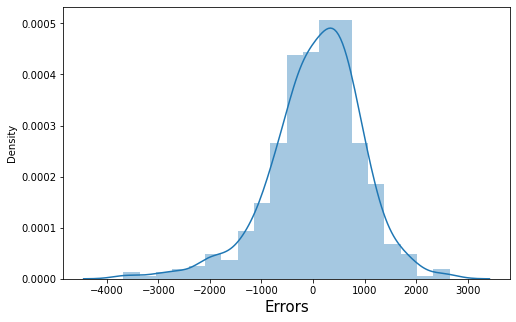

In [70]:
fig = plt.figure()
plt.figure(figsize=(8,5))
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 15)               
plt.xlabel('Errors', fontsize = 15)

# Checking Adjusted R^2 

In [71]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2_score(y_test, predicted_value))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1),4)
print(adjusted_r2)

0.7768


In [72]:
# Calculating Adjusted-R^2 value for the train dataset

adjusted_r2 = round(1-(1-r2_score(y_train, predicted_value1))*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1),4)
print(adjusted_r2)

0.8261


# Model Evaluation

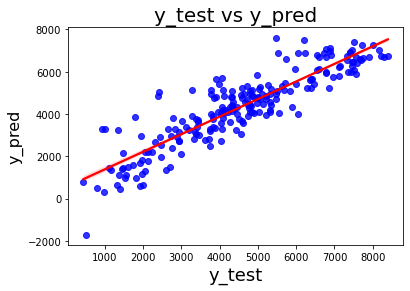

In [73]:
#Plotting a Regression plot between the actual test values (y_test) and the predicted values (predicted_value) using seaborn library.

plt.figure()
sns.regplot(x=y_test, y=predicted_value, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Train dataset for R^2  : 82.95%

# Test dataset for R^2 : 78.71%

# Train dataset Adjusted R^2 : 0.8261

# Test dataset Adjusted R^2 : 0.7768

# We can see that the equation for best fitted line is:

# y=-913.3109xspring+341.0997xwinter-381.0105xJanuary-597.4692xJuly+472.3673xSeptember-2462.8150xLight rain_Light snow_Thunderstorm-673.2605xMist_cloudy+2050.8328xyr+3760.6809xtemp-1301.1387xwindspeed

# We can see the demand for bikes depends mainly on below variables:
spring,Winter,January,July,September,Light rain_Light snow_Thunderstorm,Mist_cloudy,yr,temp,windspeed.

# Demand decreases in spring and summer season and in the month of January ,July and during Light rain_Light snow_Thunderstorm and in Mist_cloudy and when windspeed is high and its also working day.

# Demand increase in month of September, depends on yr(year).